<a href="https://colab.research.google.com/github/WalkedKO/Circle-In-Square-problem-with-scikit-opt/blob/main/Circle_In_Square_problem_with_guofei9987_scikit_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pip install scikit-opt

In [ ]:
import sko
from sko.GA import RCGA
from sko.operators import crossover

# Problem

Na wejściu mamy 4 współrzędne kwadratu na kartezjańskim układzie współrzędnych.
Chcemy wygenerować koło (współrzędne środka i promień) który jest wpisany w kwadrat, tak jak na rysunku.

In [ ]:
def plot_square_circle(points, circle_params, title):
  fig, ax = plt.subplots()

  plt.plot(points[0], points[1], color='blue')
  plt.plot(points[1], points[2], color='blue')
  plt.plot(points[2], points[3], color='blue')
  plt.plot(points[3], points[0], color='blue')

  circle_x, circle_y, circle_radius = circle_params
  circle_patch = plt.Circle((circle_x, circle_y), radius=circle_radius, edgecolor='red', facecolor='none')
  ax.add_patch(circle_patch)
  fig.set_figwidth(5)
  fig.set_figheight(5)
  plt.title(title)
  plt.show() # Call plt.show() only once

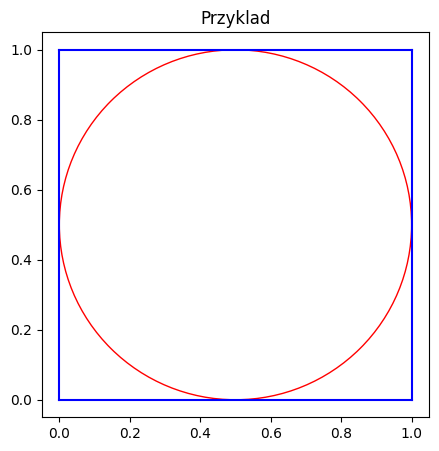

In [ ]:
plot_square_circle([[0,0], [0,1], [1,1], [1,0]], (0.5, 0.5, 0.5), "Przyklad")

# Rozwiązanie za pomocą obliczeń ewolucyjnych z biblioteki guofei9987/scikit-opt

Zanim przejdziemy do przetestowania różnych rozwiązań, stwórzmy "fitness function" czyli funkcję do której minimum będziemy dążyć.


Jako że dla czterech punktów wejściowych (współrzędne kwadratu) chcemy znaleźć koło (współrzędne środka i promień) którego środek to środek kwadratu a promień to połowa boku. Co prawda jest to już rozwiązanie problemu, jednak przykład ten ma na celu pokazanie jak dane obliczenia ewolucyjne poradzą sobie z tym problemem.

In [ ]:
def fitness_template(square, circle):
  circle_point = (circle[0], circle[1])
  radius = circle[2]
  perfect_center = np.array([(square[0][0] + square[2][0]) / 2, (square[0][1] + square[2][1]) / 2])

  perfect_radius = np.linalg.norm(np.array(square[0]) - np.array(square[1])) / 2
  center_shift = np.linalg.norm(np.array(circle_point) - perfect_center)
  radius_diff = abs(radius - perfect_radius)

  return center_shift + radius_diff

In [ ]:
test_square = [[0,0], [0,1], [1,1], [1,0]]
fitness = lambda x: fitness_template(test_square, x)

## Differential Evolution

Przetestujmy jak ewolucja różnicowa poradzi sobie z tym problemem.




In [ ]:
from sko.DE import DE
de = DE(func = fitness, n_dim = 3, size_pop = 50, max_iter = 800, lb=[-10, -10, 0], ub=[10, 10, 20])
best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [0.5 0.5 0.5] 
 best_y: [0.]


Pokażmy jak ten wynik wygląda na płaszczyźnie

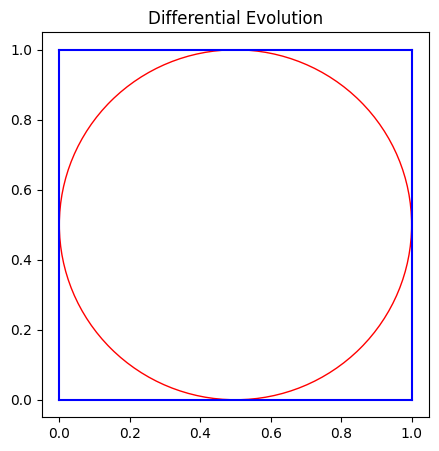

In [ ]:
plot_square_circle(test_square, best_x, "Differential Evolution")

Zobaczmy po jakim czasie algorytm nauczył się odpowiedzi

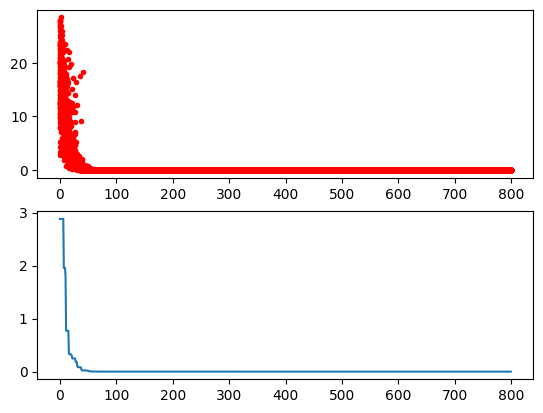

In [ ]:
Y_history = pd.DataFrame(de.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

Jak widać, już przed 100 pokoleniem wyznaczono dobre koło, przybliżmy wykres


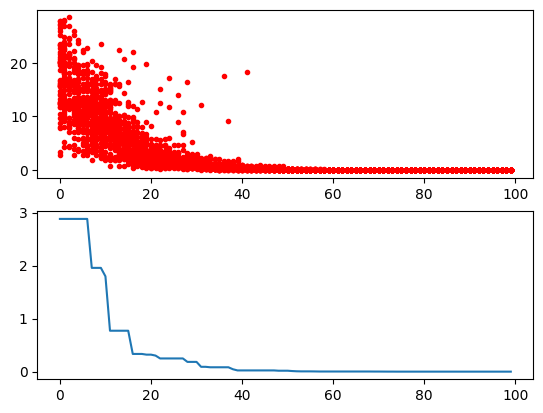

In [ ]:
Y_history = pd.DataFrame(de.all_history_Y)[:100]
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

Sprawdźmy jak szybko algorytm znajdzie rozwiązanie dla różnych populacji

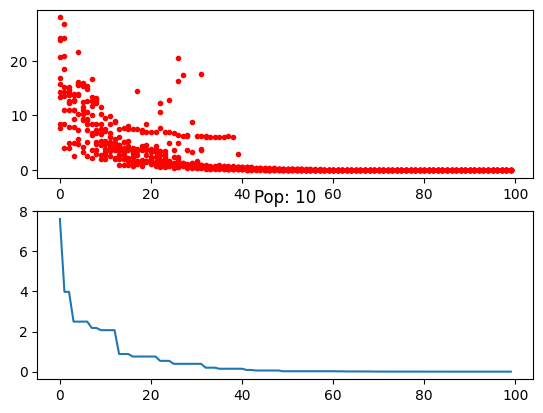

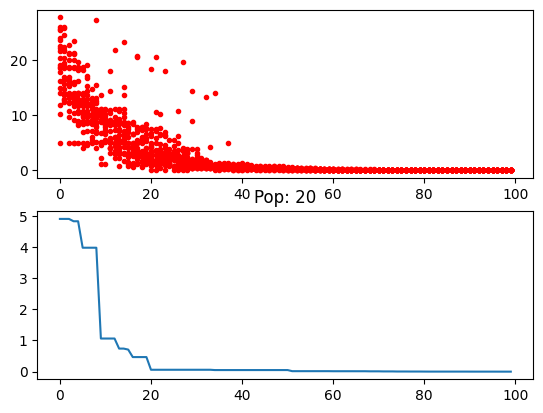

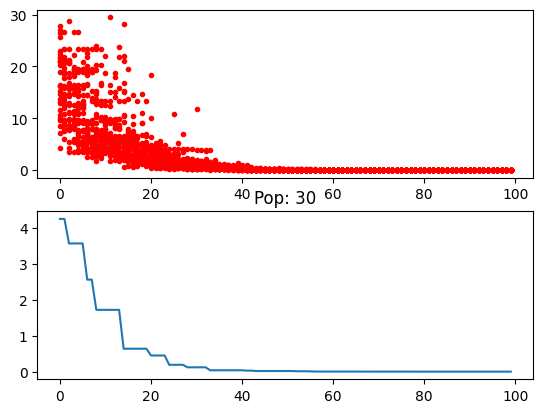

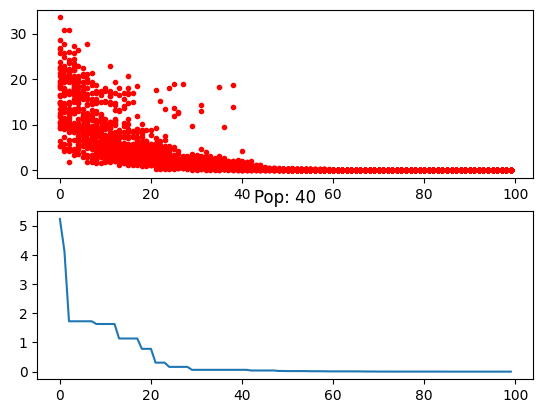

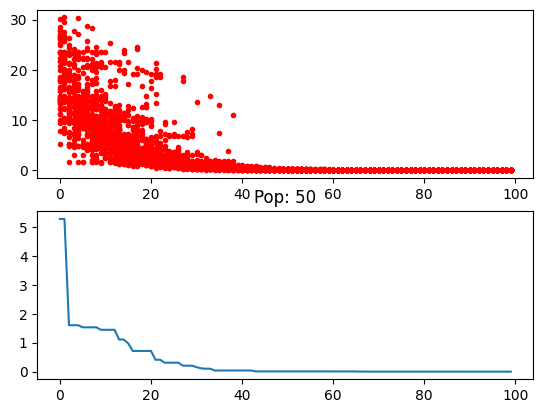

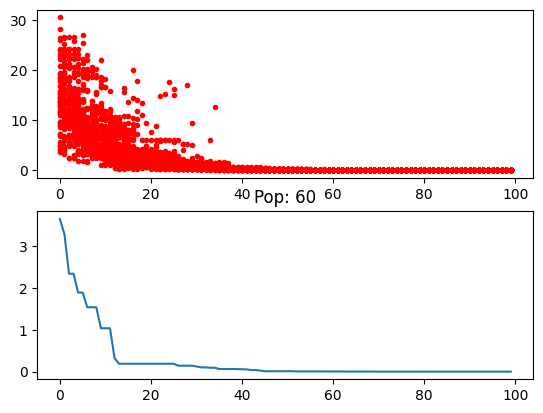

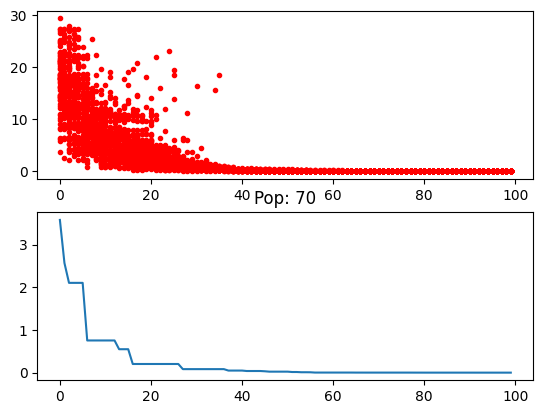

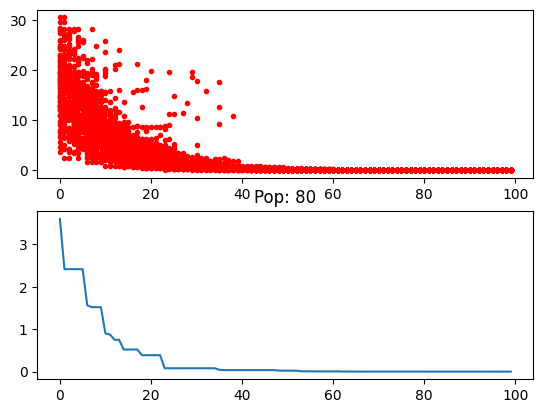

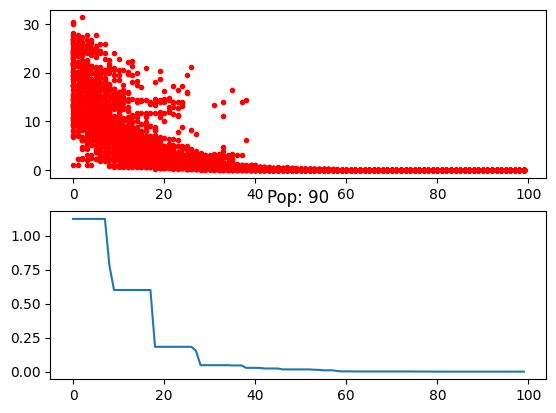

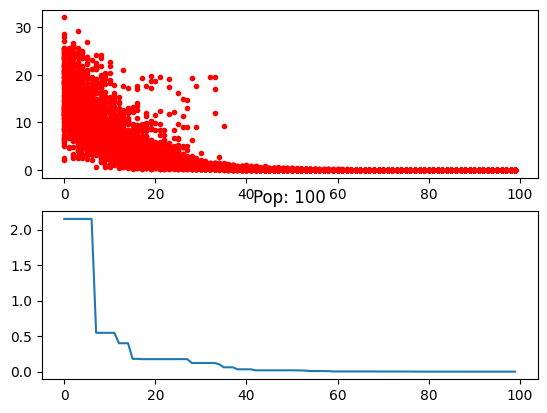

In [ ]:
for i in range(1, 11):
  pop = i * 10
  de = DE(func = fitness, n_dim = 3, size_pop = pop, max_iter = 800, lb=[-10, -10, 0], ub=[10, 10, 20])
  de.run()
  Y_history = pd.DataFrame(de.all_history_Y)[:100]
  fig, ax = plt.subplots(2, 1)
  ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
  Y_history.min(axis=1).cummin().plot(kind='line')
  plt.title(f"Pop: {pop}")
  plt.show()

Widać że na tym przykładzie mała populacja działa wystarczająco.

## Genetic Algorithm


Wykonajmy te same procedury dla algorytmu genetycznego

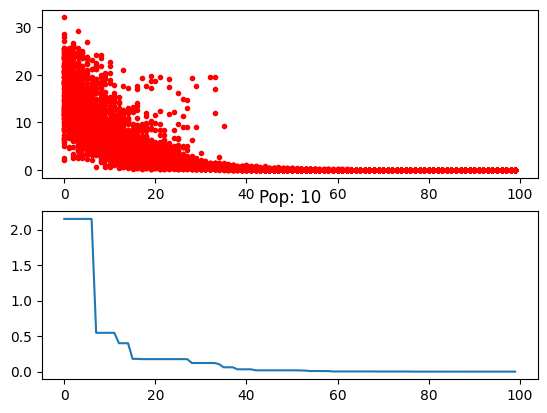

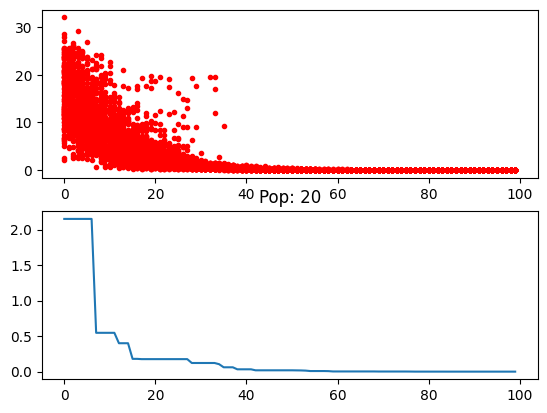

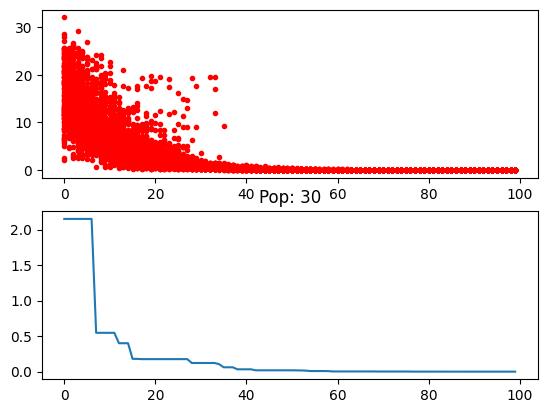

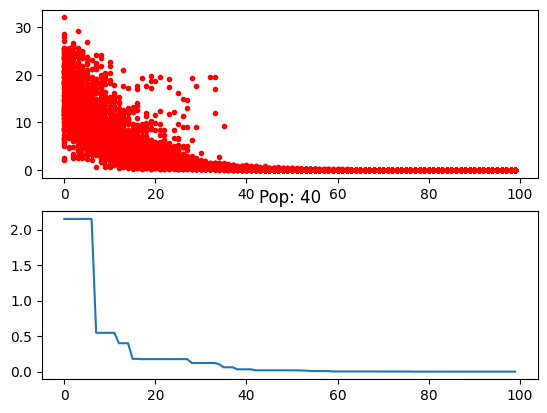

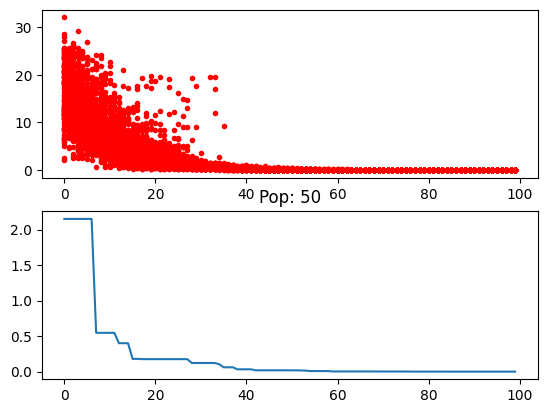

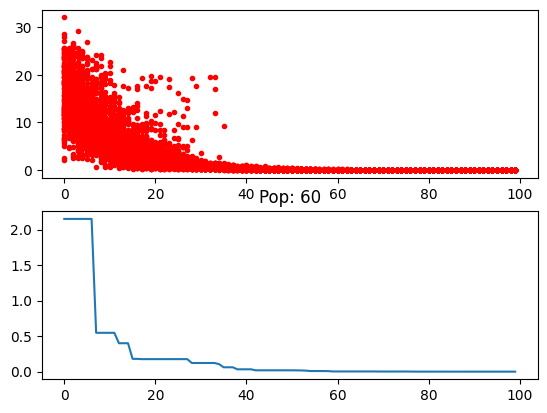

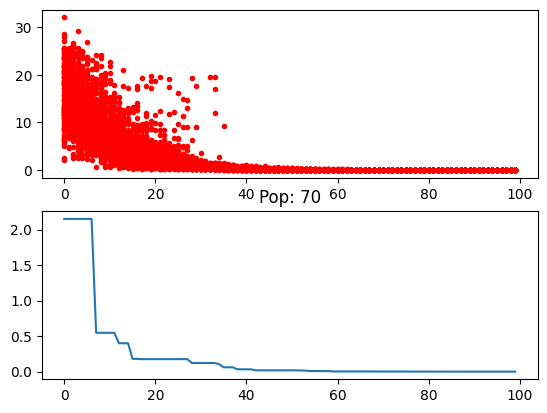

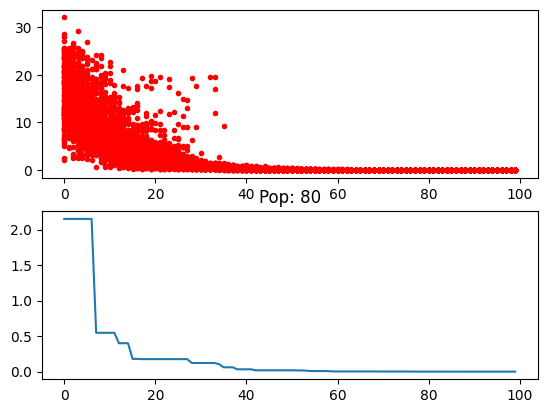

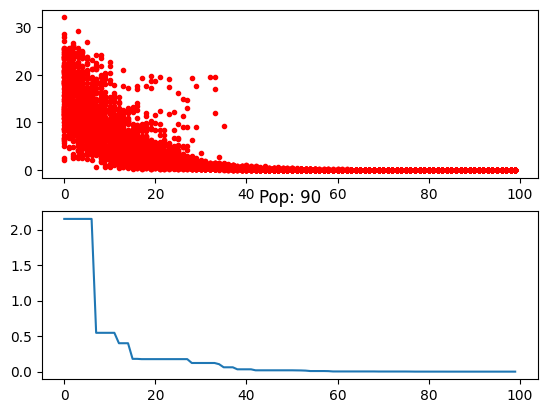

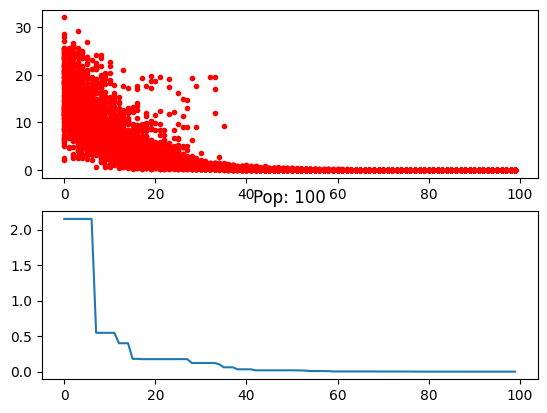

In [ ]:
from sko.GA import GA
for i in range(1, 11):
  pop = i * 10
  ga = GA(func = fitness, n_dim = 3, size_pop = pop, max_iter = 800, lb=[-10, -10, 0], ub=[10, 10, 20])
  ga.run()
  Y_history = pd.DataFrame(de.all_history_Y)[:100]
  fig, ax = plt.subplots(2, 1)
  ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
  Y_history.min(axis=1).cummin().plot(kind='line')
  plt.title(f"Pop: {pop}")
  plt.show()